  iso_code continent     location      date  population  new_cases  \
0      AFG      Asia  Afghanistan  1/3/2020    41128772        0.0   
1      AFG      Asia  Afghanistan  1/4/2020    41128772        0.0   
2      AFG      Asia  Afghanistan  1/5/2020    41128772        0.0   
3      AFG      Asia  Afghanistan  1/6/2020    41128772        0.0   
4      AFG      Asia  Afghanistan  1/7/2020    41128772        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         0.0                  NaN  ...   
1                 NaN           NaN         0.0                  NaN  ...   
2                 NaN           NaN         0.0                  NaN  ...   
3                 NaN           NaN         0.0                  NaN  ...   
4                 NaN           NaN         0.0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0           NaN                  37.746      

/tmp/ipython-input-2789211436.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='continent', palette='Set2', data=df)


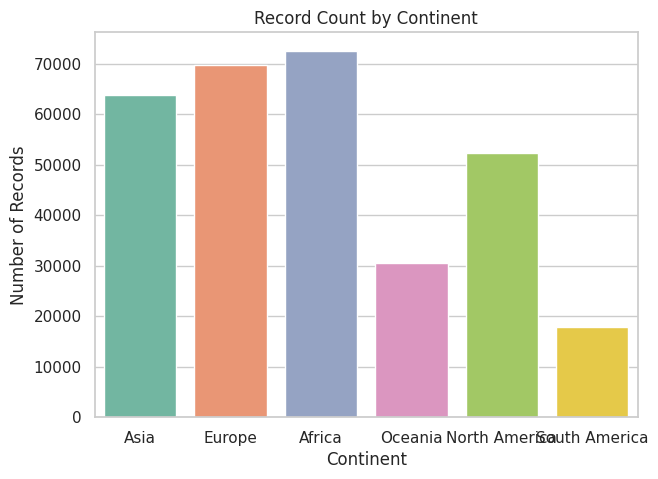

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load COVID dataset
df = pd.read_csv("/owid-covid-data.csv.zip")

# Clean: drop rows without continent
df = df.dropna(subset=["continent"])

# Set Seaborn style
sns.set(style="whitegrid")

print(df.head())

# --- VISUALIZATION 1 ---
# Record Count (like Survival Count)
plt.figure(figsize=(7, 5))
sns.countplot(x='continent', palette='Set2', data=df)
plt.title("Record Count by Continent")
plt.xlabel("Continent")
plt.ylabel("Number of Records")
plt.show()




# New section

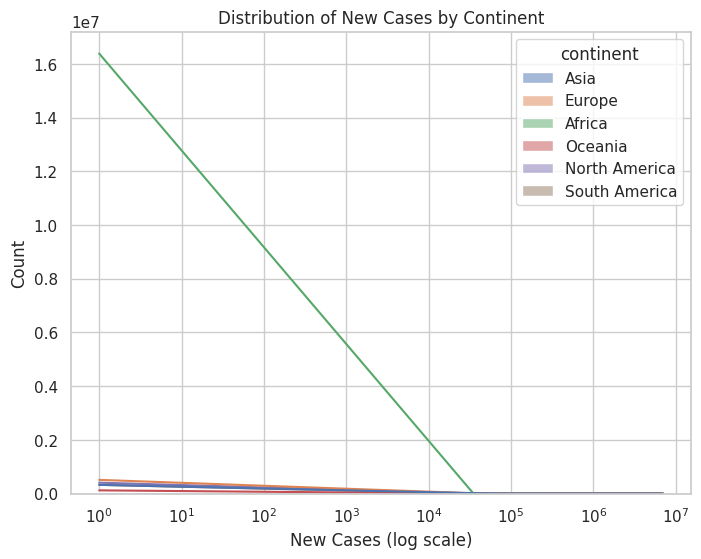

In [6]:
# --- VISUALIZATION 2 ---
# New Cases Distribution by Continent (like Age Distribution by Gender)
plt.figure(figsize=(8, 6))
sns.histplot(data=df[df["new_cases"] > 0],
             x='new_cases', hue='continent', kde=True, bins=30)
plt.title("Distribution of New Cases by Continent")
plt.xlabel("New Cases (log scale)")
plt.ylabel("Count")
plt.xscale("log")   # log scale to make histogram readable
plt.show()



/tmp/ipython-input-83735903.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(


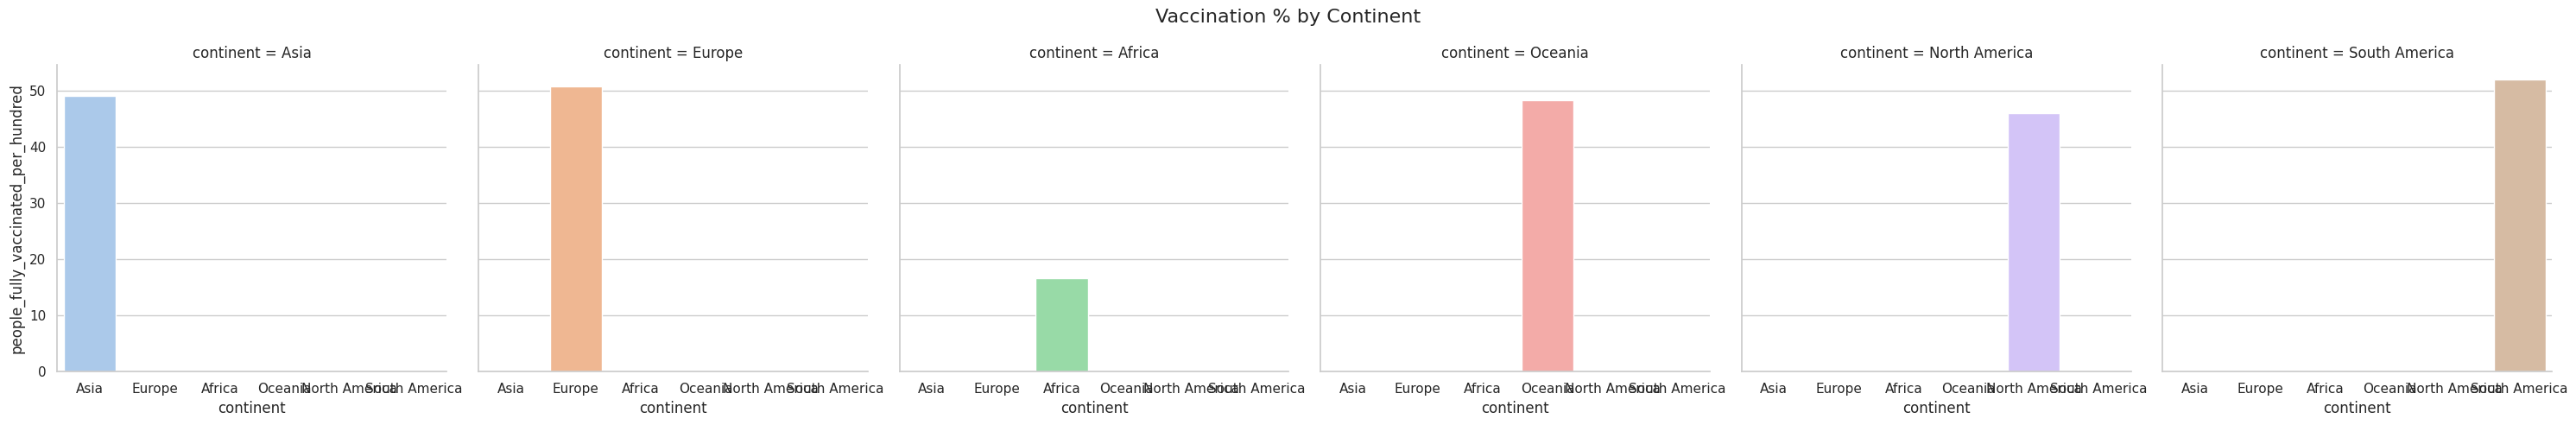

In [7]:
# --- VISUALIZATION 3 ---
# Vaccination Status by Continent (like Survival by Class and Gender)

if "people_fully_vaccinated_per_hundred" in df.columns:
    g = sns.catplot(
        x="continent",
        y="people_fully_vaccinated_per_hundred",
        hue="continent",
        col="continent",   # Facet by continent
        data=df,
        kind="bar",
        palette="pastel",
        ci=None,
        height=5,
        aspect=1
    )
    g.fig.subplots_adjust(top=0.85)
    g.fig.suptitle("Vaccination % by Continent", fontsize=16)
    plt.show()
else:
    print("⚠️ Column 'people_fully_vaccinated_per_hundred' not found in DataFrame.")
